In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import (precision_score, recall_score, accuracy_score)
import matplotlib.pyplot as plt

%matplotlib inline
# For unknown reasons, the IPython backend for Matplotlib does not work well on my computer with default settings
# This is a fix.
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (10.0, 10.0), 'figure.facecolor': (1, 1, 1, 0), 'figure.subplot.bottom': 0.125, 'figure.edgecolor': (1, 1, 1, 0), 'figure.dpi': 72}


In [2]:
df = pd.read_csv('landlocked.csv')
df.describe()

,x,y
count,415.000000,415.000000
mean,0.107720,-0.050728
std,1.499599,1.441266
min,-3.933978,-3.751982
25%,-0.884772,-1.170070
50%,0.037582,-0.059550
75%,1.189670,0.989012
max,4.529132,3.928753


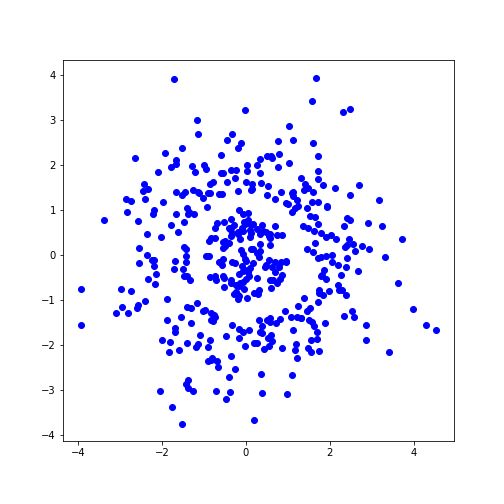

In [3]:
x = df['x'].values
y = df['y'].values
plt.figure(figsize=(7, 7))
plt.plot(x, y, 'bo')
plt.show()

In [4]:
testtest = [4, 6 ,2,10, 5,3]
mmmm = [testtest[i] for i in range(len(testtest)) if testtest[i]>5]
mmmm

[6, 10]

In [5]:
z = [(x[i]**2 + y[i]**2) for i in range(len(x))] 

In [6]:
mark = [1 if z[i]<2 else 0 for i in range(len(z))]

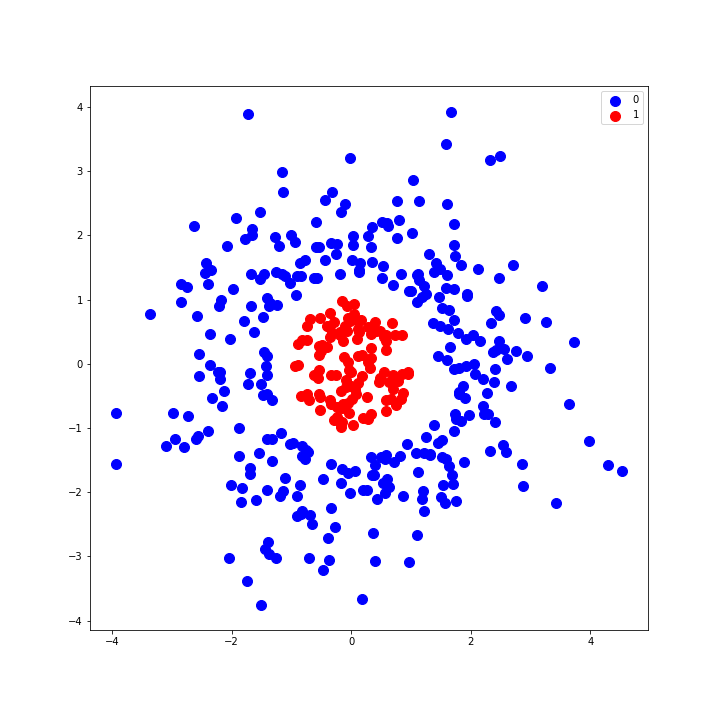

In [7]:
scatter_x = np.array(x)
scatter_y = np.array(y)
group = np.array(mark)
cdict = {0: 'blue', 1: 'red'}

plt.figure()
for g in np.unique(group):
    ix = np.where(group == g)
    plt.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
plt.legend()
plt.show()

In [8]:
x2 = scatter_x**2
y2 = scatter_y**2
#z2 = scatter_x**2 + scatter_y**2

In [9]:
combined = np.vstack((scatter_x, scatter_y, x2, y2)).T
combined.shape

(415, 4)

In [28]:
from sklearn import linear_model
from sklearn.metrics import (precision_score, recall_score, accuracy_score)
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    combined, group, test_size=0.95, random_state=42)

logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print('Accuracy score :', accuracy_score(y_test, y_pred))
print('Precision score :', precision_score(y_test, y_pred))
print('Recall score :', recall_score(y_test, y_pred))


Accuracy score : 0.9620253164556962
Precision score : 0.9174311926605505
Recall score : 0.9433962264150944


/home/muveexu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Estimated number of clusters: 1
Estimated number of noise points: 305
Homogeneity: 0.950
Completeness: 0.958
V-measure: 0.954
Adjusted Rand Index: 0.980
Adjusted Mutual Information: 0.950
Silhouette Coefficient: 0.090


/home/muveexu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


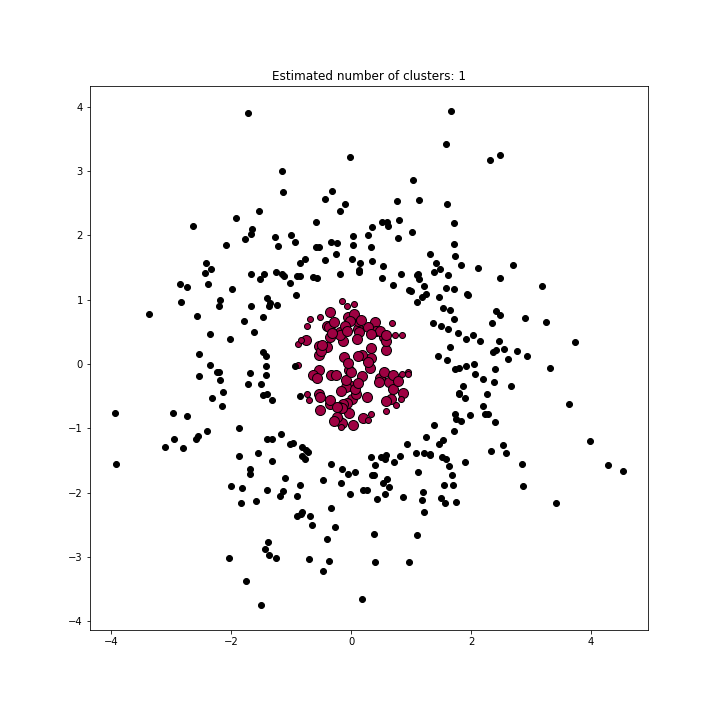

In [58]:
# Reference: sklearn document
from sklearn.cluster import DBSCAN
from sklearn import metrics


X = combined
labels_true = np.array(mark)
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [66]:
X_train = X
y_train = np.array(mark).transpose()
X = combined

ValueError: X.shape[1] = 2 should be equal to 4, the number of features at training time

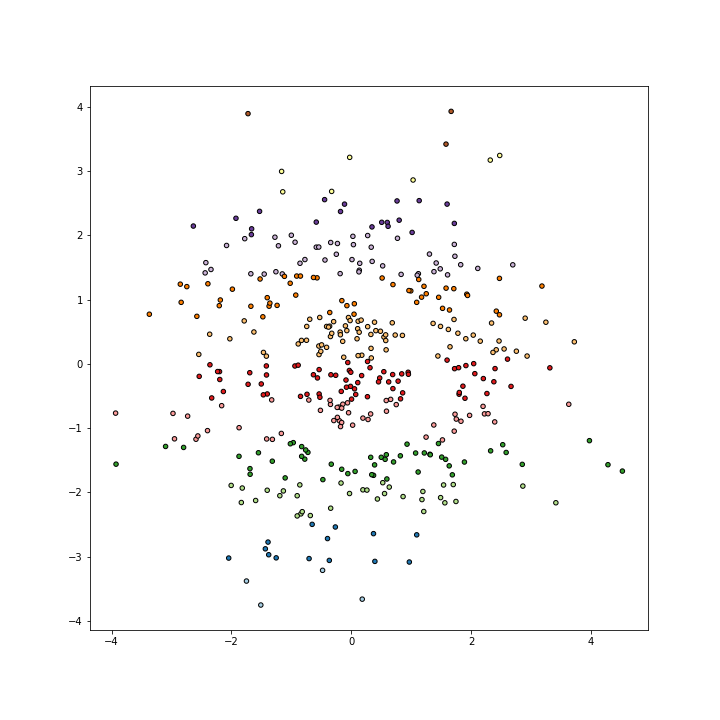

In [67]:
from sklearn import datasets, svm


for fig_num, kernel in enumerate(('linear', 'rbf', 'poly')):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolor='k', s=20)

    # Circle out the test data
#     plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none',
#                 zorder=10, edgecolor='k')

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.title(kernel)
plt.show()

In [9]:
combined = np.vstack((scatter_x, scatter_y)).T
combined.shape

(415, 2)

Estimated number of clusters: 1
Estimated number of noise points: 315
Homogeneity: 0.789
Completeness: 0.834
V-measure: 0.811
Adjusted Rand Index: 0.881
Adjusted Mutual Information: 0.789
Silhouette Coefficient: -0.034


/home/muveexu/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


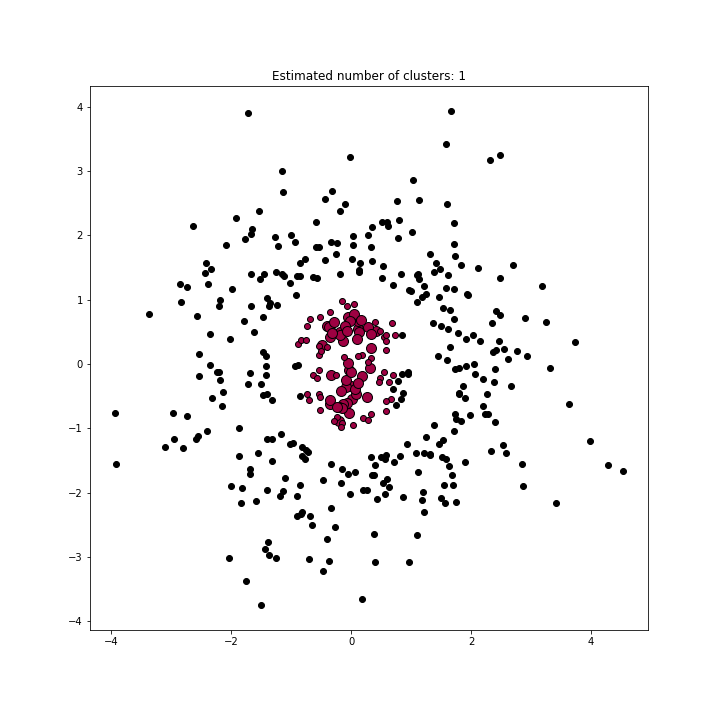

In [79]:
# Reference: sklearn document
from sklearn.cluster import DBSCAN
from sklearn import metrics


X = combined
labels_true = np.array(mark)
db = DBSCAN(eps=0.4, min_samples=16.5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=10)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [66]:
y_pred = db.labels_.astype(np.int)

In [67]:
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [91]:
np.unique(y_pred)

array([-1,  0])

In [71]:
from itertools import cycle, islice

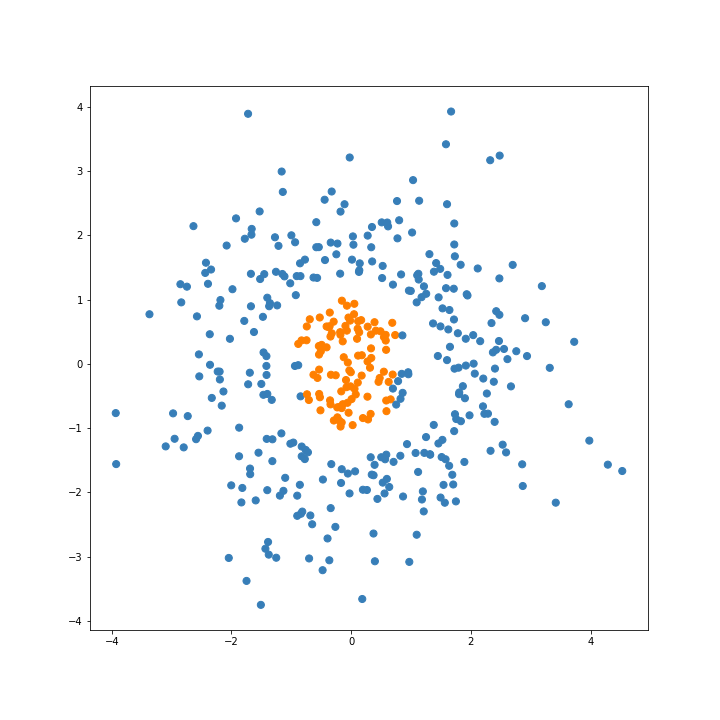

In [89]:
colors = np.array(['#ff7f00', "#377eb8"])
plt.scatter(X[:, 0], X[:, 1],  s=50, color=colors[y_pred] )
plt.show()